# **Sentiment Analysis of Tweets**

In [18]:
# # Importing Libraries
!pip install neattext
!pip install ktrain
# #==0.23.2
!pip install imblearn
!pip install emoji
import emoji
from sklearn.ensemble import RandomForestClassifier
from imblearn.metrics import sensitivity_score, specificity_score
import neattext.functions as nfx
from sklearn import metrics
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import math
import ktrain
import numpy as np
import pandas as pd
from ktrain import text
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import tweepy
import sys
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import time
import datetime 
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import pandas as pd
from nltk.corpus import stopwords
import re
pd.set_option('display.max_colwidth', 100)
import unicodedata
import plotly.graph_objects as go
import seaborn as sns
from nltk import bigrams
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from plotly.subplots import make_subplots
from nltk.util import ngrams
import nltk

# Elements of preprocessing
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')

ImportError: cannot import name '_raise_dep_warning_if_not_pytest' from 'sklearn.utils.deprecation' (C:\ProgramData\Anaconda3\envs\env\lib\site-packages\sklearn\utils\deprecation.py)

- Uncomment the line below in order to fetch the tweets from twitter and save in csv format on the needed location.

In [19]:
# import tweepy
# import pandas as pd
# #Twitter developer account credentials
# consumer_key="ArvY8sU6HDZSuGk9nMADCd1Za"
# consumer_secret="WhhxixavlxGgAsr6nHwwjmsEDdNCBGCC2LxHJWLl0Tho5OcTKe"
# access_token="2415738176-GCKuN5W25sftYfjOMXMgA1UXaS6kHkl8gYnMWGm"
# access_token_secret="GBzgC4NrDA4XhCf7CS6md1zQuNmm0o458rhJSqfz3PFki"
# BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAB%2FTNwEAAAAAVJ9eZ2QOZtV6XLvnSyKpFLXsSvM%3DxZ6H7C5dNsJTvzttvypgHnedYpByZ9bUOgvxQXXLVHf2TdAEFU"

# #Switching to application authentication
# auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
# auth.set_access_token(access_token, access_token_secret)
# auth.secure = True

# #Setting up api wrapper
# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# #Error handling
# if (not api):
#     print ("Problem in connecting to API")

# #You can check how many queries you have left using rate_limit_status() method
# api.rate_limit_status()['resources']['search']

# # Switching to application authentication
# auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

# # Setting up new api wrapper, using authentication only
# api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

# # Handels error if any
# if (not api):
#     print ("Problem in Connecting to API")

# #maximum number of tweets
# number_tweets= 1000
# #Per query tweets
# tweetsPerQry = 100

# #search_words
# search_words= "india"

# retweet_filter='-filter:retweets'

# q=search_words+retweet_filter
# # Specify the date
# date_since= "2020-12-08"

# tweetCount = 0
# geo =[]
# tweets=[]
# likes=[]
# user=[]
# location= []
# date=[]


# for tweet in tweepy.Cursor(api.search, q= q,lang="en",since= date_since, tweet_mode='extended').items(number_tweets) :
#         geo.append(tweet.geo)
#         tweets.append(tweet.full_text)
#         likes.append(tweet.favorite_count)
#         user.append(tweet.user.screen_name)
#         location.append(tweet.user.location)
#         date.append(tweet.created_at)
#         tweetCount += 1

# print("Downloaded {0} tweets".format(tweetCount))

# vacc_tweet_5= pd.DataFrame({'geo':geo,'tweets':tweets,'likes':likes,'user':user,'location':location,'date': date})

# #Saving Tweets in csv file
# vacc_tweet_5.to_csv('./vaccination_all_tweets.csv',index=False)

In [20]:
# Loading dataset with encoding type
# df1 data is generated with the help of the above code
import pandas as pd
df1 = pd.read_csv('./covid_vaccine.csv' ,encoding= 'unicode_escape')
# df2 data is generated with the help of scrape.ipynb file from the twitter
df2 = pd.read_csv('./complete_covid_tweets.csv')

C:\ProgramData\Anaconda3\envs\env\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
# Data1
df1.head()

,tweet_id,label,tweet_text
0,1.360342e+18,1,"4,000 a day dying from the so called Covid-19 ..."
1,1.382896e+18,2,Pranam message for today manifested in Dhyan b...
2,1.375673e+18,2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,1.381311e+18,1,"Confirmation that Chinese #vaccines ""dont hav..."
4,1.362166e+18,3,"Lab studies suggest #Pfizer, #Moderna vaccines..."


In [22]:
# Data2
df2.head()

,Unnamed: 0,Unnamed: 0.1,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,tweet_id,label,tweet_text
0,0,0.0,forbesmarketing,NaN,NaN,286.0,27.0,4966.0,4.0,United Airlines have updated their coronavirus...,[],NaN,NaN,NaN
1,1,1.0,citizenofthewr1,Interested in world politics. Advocate for pea...,NaN,580.0,21.0,5297.0,153.0,Inside an Ontario ICU where the COVID-19 patie...,[],NaN,NaN,NaN
2,2,2.0,GRamsbottom,1st Lady of HR- 🇨🇦; owner of 3 lovely blockcha...,Oxford U; Harvard U; McGill U,2620.0,1791.0,113417.0,0.0,#recruitment changes in the post #coronavirus ...,"['recruitment', 'coronavirus', 'HR', 'RH', 'te...",NaN,NaN,NaN
3,3,3.0,ArthurReinholt,NaN,"Indiana, USA",334.0,90.0,2138.0,3704.0,"🇺🇸🦠 A sea of 650,000 white flags - one for eve...",[],NaN,NaN,NaN
4,4,4.0,africanaffairs,All about #AfricanAffairs. Promoting African H...,Africa,974.0,1095.0,37974.0,0.0,Now playing on African Affairs Radio: mawie by...,"['africansarenotlabrats', 'standby', 'coronavi...",NaN,NaN,NaN


In [23]:
# Taking the relevant column
df2 = df2[['text']]
df2.head()

,text
0,United Airlines have updated their coronavirus...
1,Inside an Ontario ICU where the COVID-19 patie...
2,#recruitment changes in the post #coronavirus ...
3,"🇺🇸🦠 A sea of 650,000 white flags - one for eve..."
4,Now playing on African Affairs Radio: mawie by...


In [24]:
# creating dataframe
df = pd.DataFrame(columns=['text'])
df.text = df1['tweet_text']

# combining the data
df = df.append(df2)
df.head()

,text
0,"4,000 a day dying from the so called Covid-19 ..."
1,Pranam message for today manifested in Dhyan b...
2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,"Confirmation that Chinese #vaccines ""dont hav..."
4,"Lab studies suggest #Pfizer, #Moderna vaccines..."


In [25]:
# Checking the shape
df.shape

(90180, 1)

In [26]:
# Columns in the data
df.columns

Index(['text'], dtype='object')

In [27]:
# Checking the null values
df.isnull().sum()

text    6000
dtype: int64

In [28]:
# Dropping out null values from the dataset
df.dropna(inplace=True)

# Combining the data and then saving the relevant portion so as to use it directly
# df.to_csv('./K2037591_data.csv')

In [29]:
# Loading the data
df=pd.read_csv('./K2037591_data.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

,text
0,"4,000 a day dying from the so called Covid-19 ..."
1,Pranam message for today manifested in Dhyan b...
2,Hyderabad-based ?@BharatBiotech? has sought fu...
3,"Confirmation that Chinese #vaccines ""dont hav..."
4,"Lab studies suggest #Pfizer, #Moderna vaccines..."


In [30]:
# Shape
df.shape

(84180, 1)

- Removing all the emojis instances because a tweet can have different contexts, there is a huge possibility that the replacing word of emoji might take the sentence in totally different possibilty which will lead our model to predict wrong.

In [31]:
# tweet removal
def extract_emojis(s):
  return ''.join(c for c in s if c in emoji.UNICODE_EMOJI['en'])

data = []
for i in range(df.shape[0]):
  emoji_ = []
  emoji_ = extract_emojis(df.text[i])
  if len(emoji_)==0:
      data.append(df.text[i])

In [32]:
# Length
len(data)

74746

- Removing the tweets which are having urls with them. It is because when a post is created then there is a possibility that tweet might be absent another possibilty is the only presence of hashtags therefore removing those tweets is the better opinion to achieve better accuracy.

In [33]:
#removing tweets containing urls
data_noUrl = []
for tweet in data:
  if 'https:' not in tweet:
    data_noUrl.append(tweet)
len(data_noUrl)

23898

In [34]:
# Sample
data_noUrl[3]

'When we can get #moderna and #pfitzer Vaccine in India?\n@narendramodi \n@MoHFW_INDIA'

In [35]:
#removing some escape characters
escapes = '\b\n\x92\x91\x93\x94\r\t\\' 
for s in range(len(data_noUrl)):
  for c in escapes: 
    data_noUrl[s]=data_noUrl[s].replace(c, '') 
data_noUrl

['Safe and effective. #OxfordAstraZeneca',
 'The day after the #Moderna #COVID19Vaccine... My arm is a little sore and I am a little more fatigued than usual. My grandparents had no noticeable effects though.',
 '@syd_m39 Not a girl but part of the #Moderna club ?',
 'When we can get #moderna and #pfitzer Vaccine in India?@narendramodi @MoHFW_INDIA',
 'Officially a #Moderna gay ?',
 'Got the #PfizerBioNTech vaccine !!',
 '@sanket #SputnikV  at 91% efficiency is far ahead of #Covishield and #Covaxin.',
 'One more to go #firstdosedone #Moderna thankful @SutterHealth @SCCgov',
 'I got the second dose of my #Moderna #vaccine yesterday and so far the only side effect has been (pretty bad but manageable) soreness in the injected arm.',
 'Just got  my 2nd #moderna shot. My mom &amp; grandma got #johnsonandjohnson &amp; #pfizer. We 3 have deathly allergies, but had zero #allergic or adverse reactions ! Dont let allergies stop you from getting the #COVID19Vaccine',
 'Especially because we lack 

In [36]:
df = pd.DataFrame(columns=['text'])
df['text']=data_noUrl

In [37]:
# Extracting hashtags
df['text'].apply(nfx.extract_hashtags)

0                                     [#OxfordAstraZeneca]
1                           [#Moderna, #COVID19Vaccine...]
2                                               [#Moderna]
3                                     [#moderna, #pfitzer]
4                                               [#Moderna]
                               ...                        
23893          [#wuhanvirus, #DictatorofChina, #XiJinping]
23894                           [#ChinaVirus, #WuhanVirus]
23895                                        [#WuhanVirus]
23896                                        [#WuhanVirus]
23897    [#BREAKING, #UPDATE#coronavirus, #CoronaVirusU...
Name: text, Length: 23898, dtype: object

In [38]:
# Saving hashtage to a column
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [39]:
# Cleaning text with removal of hashtags
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [40]:
# Previewing data
df[['text','clean_tweet']]

,text,clean_tweet
0,Safe and effective. #OxfordAstraZeneca,Safe and effective.
1,The day after the #Moderna #COVID19Vaccine... ...,The day after the My arm is a little sore ...
2,@syd_m39 Not a girl but part of the #Moderna c...,@syd_m39 Not a girl but part of the club ?
3,When we can get #moderna and #pfitzer Vaccine ...,When we can get and Vaccine in India?@nare...
4,Officially a #Moderna gay ?,Officially a gay ?
...,...,...
23893,@globaltimesnews Its happening because of you ...,@globaltimesnews Its happening because of you ...
23894,@China_Amb_India Opportunist country #ChinaVir...,@China_Amb_India Opportunist country
23895,@Respond2Racism @Respond2Racism is a bot creat...,@Respond2Racism @Respond2Racism is a bot creat...
23896,@SpokespersonCHN Correction: 1 in every 8 Amer...,@SpokespersonCHN Correction: 1 in every 8 Amer...


In [41]:
# Removing userhandels
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))

In [42]:
df[['text','clean_tweet']]

,text,clean_tweet
0,Safe and effective. #OxfordAstraZeneca,Safe and effective.
1,The day after the #Moderna #COVID19Vaccine... ...,The day after the My arm is a little sore ...
2,@syd_m39 Not a girl but part of the #Moderna c...,Not a girl but part of the club ?
3,When we can get #moderna and #pfitzer Vaccine ...,When we can get and Vaccine in India?
4,Officially a #Moderna gay ?,Officially a gay ?
...,...,...
23893,@globaltimesnews Its happening because of you ...,Its happening because of you
23894,@China_Amb_India Opportunist country #ChinaVir...,Opportunist country
23895,@Respond2Racism @Respond2Racism is a bot creat...,is a bot created and sponsored by the CCP ...
23896,@SpokespersonCHN Correction: 1 in every 8 Amer...,Correction: 1 in every 8 Americans has been ...


In [43]:
# Removing multiple spaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [44]:
# Removing urls
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [45]:
# Removing punctuation
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [46]:
df[['text','clean_tweet']]

,text,clean_tweet
0,Safe and effective. #OxfordAstraZeneca,Safe and effective
1,The day after the #Moderna #COVID19Vaccine... ...,The day after the My arm is a little sore and ...
2,@syd_m39 Not a girl but part of the #Moderna c...,Not a girl but part of the club
3,When we can get #moderna and #pfitzer Vaccine ...,When we can get and Vaccine in India
4,Officially a #Moderna gay ?,Officially a gay
...,...,...
23893,@globaltimesnews Its happening because of you ...,Its happening because of you
23894,@China_Amb_India Opportunist country #ChinaVir...,Opportunist country
23895,@Respond2Racism @Respond2Racism is a bot creat...,is a bot created and sponsored by the CCP to ...
23896,@SpokespersonCHN Correction: 1 in every 8 Amer...,Correction: 1 in every 8 Americans has been i...


In [47]:
# User defined function to get the sentiments
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 1
    elif sentiment_polarity < 0:
        sentiment_label = -1
    else:
        sentiment_label = 0
    result = {'polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

In [48]:
!pip install TextBlob
from textblob import TextBlob

In [49]:
# Checking Text
ex1 = df['clean_tweet'].iloc[10]
get_sentiment(ex1)

{'polarity': 0.1, 'subjectivity': 0.7, 'sentiment': 1}

In [50]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [51]:
# preview sentiment result
df['sentiment_results']

0        {'polarity': 0.55, 'subjectivity': 0.65, 'sent...
1        {'polarity': -0.03125, 'subjectivity': 0.4375,...
2        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3        {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
4        {'polarity': 0.4166666666666667, 'subjectivity...
                               ...                        
23893    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
23894    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
23895    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
23896    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
23897    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 23898, dtype: object

In [52]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [53]:
df.head()

,text,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,Safe and effective. #OxfordAstraZeneca,[#OxfordAstraZeneca],Safe and effective,"{'polarity': 0.55, 'subjectivity': 0.65, 'sent...",0.550000,0.650000,1
1,The day after the #Moderna #COVID19Vaccine... ...,"[#Moderna, #COVID19Vaccine...]",The day after the My arm is a little sore and ...,"{'polarity': -0.03125, 'subjectivity': 0.4375,...",-0.031250,0.437500,-1
2,@syd_m39 Not a girl but part of the #Moderna c...,[#Moderna],Not a girl but part of the club,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,0
3,When we can get #moderna and #pfitzer Vaccine ...,"[#moderna, #pfitzer]",When we can get and Vaccine in India,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.000000,0.000000,0
4,Officially a #Moderna gay ?,[#Moderna],Officially a gay,"{'polarity': 0.4166666666666667, 'subjectivity...",0.416667,0.583333,1


In [54]:
df['sentiment'].value_counts()

 1    11702
-1     7046
 0     5150
Name: sentiment, dtype: int64

<AxesSubplot:>

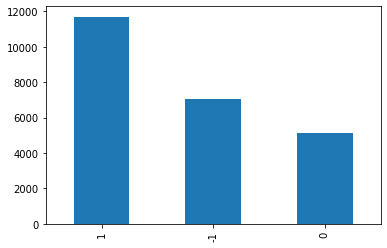

In [55]:
# Graph for value count
df['sentiment'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

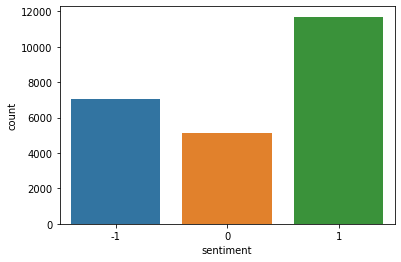

In [56]:
# Plot with seaborn
import seaborn as sns
sns.countplot(df['sentiment'])

In [57]:
# Extraction
positive_tweet = df[df['sentiment'] == 1]['clean_tweet']
neutral_tweet = df[df['sentiment'] == 0]['clean_tweet']
negative_tweet = df[df['sentiment'] == -1]['clean_tweet']

In [58]:
# Remove Stopwords and Convert to Tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [59]:
pos_tokens = [token for line in positive_tweet_list  for token in line.split()]
neg_tokens = [token for line in negative_tweet_list  for token in line.split()]
neut_tokens = [token for line in neutral_tweet_list  for token in line.split()]

In [60]:
# Get Tokens
def get_tokens(docx,num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [61]:
from collections import Counter
# Positive tokens
get_tokens(pos_tokens)

{'vaccine': 5061,
 'new': 3058,
 'vaccination': 2386,
 'people': 1907,
 'cases': 1851,
 'know': 1743,
 'amp': 1413,
 'GMT]': 1300,
 'deaths': 1258,
 'COVID19': 1235,
 'don’t': 1196,
 'like': 1096,
 'military': 878,
 'good': 864,
 'vaccinated': 822,
 'think': 781,
 'going': 781,
 'got': 762,
 'It’s': 631,
 'I’m': 609,
 '3': 595,
 'kids': 579,
 'COVID': 569,
 'died': 565,
 'told': 564,
 'point': 549,
 'says': 524,
 'proof': 522,
 'testicles': 511,
 'fighting': 510}

In [62]:
# Fetching the tokens for all sentiments
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [63]:
# Plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','scores'])
neg_df.head()

,words,scores
0,vaccine,2631
1,vaccination,2059
2,COVID,1494
3,amp,1338
4,proof,1191


In [64]:
# Word Cloud
def plot_wordcloud(docx):
    plt.figure(figsize=(20,10))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [65]:
pos_docx = ' '.join(pos_tokens)
neg_docx = ' '.join(neg_tokens)
neu_docx = ' '.join(neut_tokens)

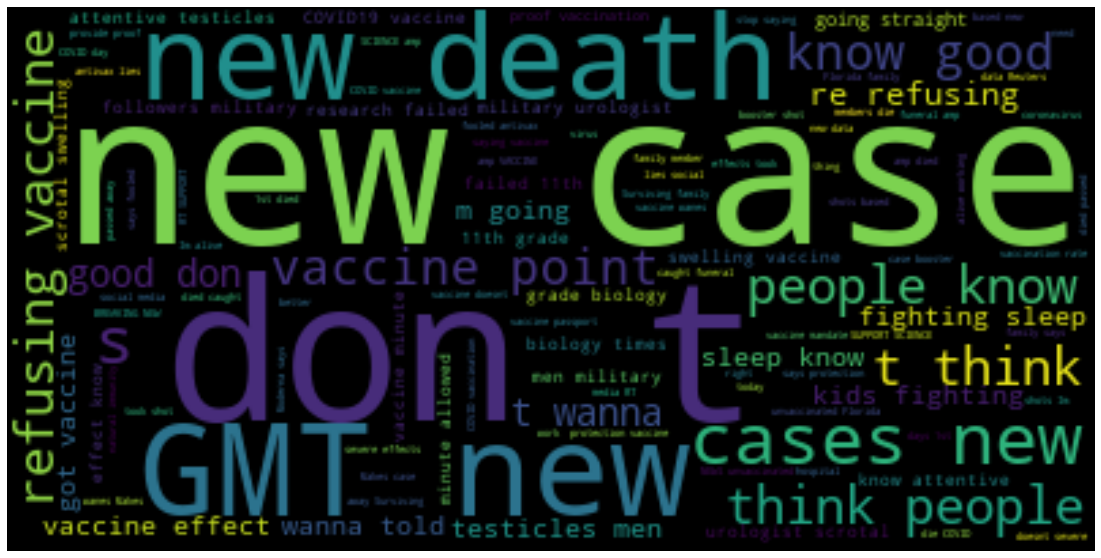

In [66]:
# Plotting wordcloud of positive words
import matplotlib.pyplot as plt
from wordcloud import WordCloud
plot_wordcloud(pos_docx)

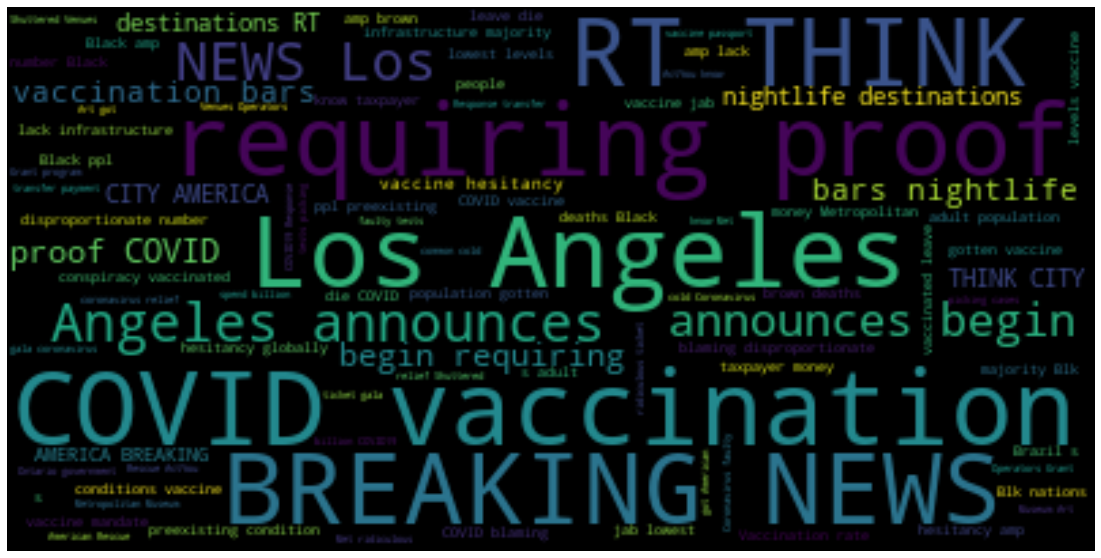

In [67]:
# Wordcloud of negative words
plot_wordcloud(neg_docx)

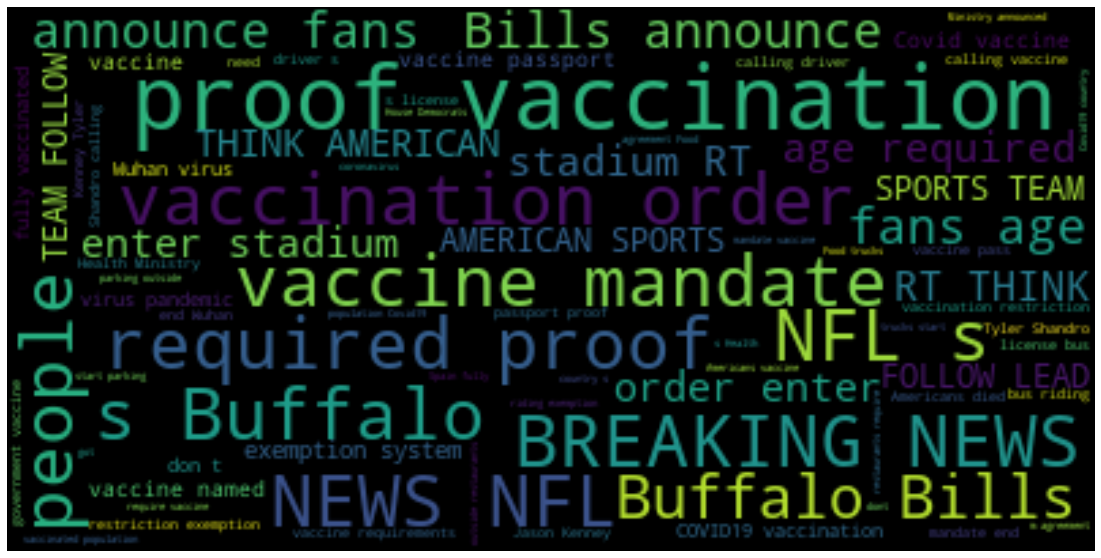

In [68]:
# Wordcloud of neutral words
plot_wordcloud(neu_docx)

In [69]:
# text clean
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    #remove stopwords
    stopwords = nltk.corpus.stopwords.words('english') #+ ADDITIONAL_STOPWORDS
    #removing non-ASCII characters,normalization, encoding/decoding, lower casing, and lemmatization.
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    # Remove mentions
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    # Remove hashtags
    text = re.sub(r'#', '', text)
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)
    text = re.sub('[0-9]+', '', text)
    words = re.sub(r'[^\w\s]', '', text).split()
    text = [wnl.lemmatize(word) for word in words if word not in stopwords]
    return text

In [70]:
import nltk 
import re
import unicodedata
tweet_cln = basic_clean(''.join(str(df['text'].tolist())))
tweet_cln

['safe',
 'effective',
 'oxfordastrazeneca',
 'day',
 'moderna',
 'covidvaccine',
 'arm',
 'little',
 'sore',
 'little',
 'fatigued',
 'usual',
 'grandparent',
 'noticeable',
 'effect',
 'though',
 'girl',
 'part',
 'moderna',
 'club',
 'get',
 'moderna',
 'pfitzer',
 'vaccine',
 'india',
 'officially',
 'moderna',
 'gay',
 'got',
 'pfizerbiontech',
 'vaccine',
 'sputnikv',
 'efficiency',
 'far',
 'ahead',
 'covishield',
 'covaxin',
 'one',
 'go',
 'firstdosedone',
 'moderna',
 'thankful',
 'got',
 'second',
 'dose',
 'moderna',
 'vaccine',
 'yesterday',
 'far',
 'side',
 'effect',
 'pretty',
 'bad',
 'manageable',
 'soreness',
 'injected',
 'arm',
 'got',
 'nd',
 'moderna',
 'shot',
 'mom',
 'amp',
 'grandma',
 'got',
 'johnsonandjohnson',
 'amp',
 'pfizer',
 'deathly',
 'allergy',
 'zero',
 'allergic',
 'adverse',
 'reaction',
 'dont',
 'let',
 'allergy',
 'stop',
 'getting',
 'covidvaccine',
 'especially',
 'lack',
 'data',
 'johnsonandjohnson',
 'vaccine',
 'efficacy',
 'specifical

In [71]:
#top 30 unigram
unigram =(pd.Series(nltk.ngrams(tweet_cln , 1)).value_counts())[:30]
unigram

(vaccine,)                12343
(covid,)                  11102
(vaccination,)             6586
(new,)                     3492
(people,)                  3417
(amp,)                     3031
(case,)                    2948
(get,)                     2921
(coronavirus,)             2717
(know,)                    2713
(like,)                    2494
(think,)                   2420
(dont,)                    2361
(one,)                     2359
(death,)                   2265
(proof,)                   2107
(vaccinated,)              2049
(every,)                   1836
(news,)                    1773
(would,)                   1741
(breaking,)                1738
(u,)                       1637
(im,)                      1572
(rt,)                      1548
(got,)                     1546
(coronaviruspandemic,)     1394
(gmt,)                     1310
(coronavirusupdate,)       1304
(requiring,)               1269
(time,)                    1258
dtype: int64

In [72]:
#Top 20 Bigrams
bigram =(pd.Series(nltk.ngrams(tweet_cln , 2)).value_counts())[:20]
bigram

(covid, vaccination)                1581
(covid, vaccine)                    1543
(breaking, news)                    1446
(new, case)                         1366
(covid, coronaviruspandemic)        1303
(coronavirus, coronavirusupdate)    1300
(coronavirusupdate, covid)          1300
(gmt, coronavirus)                  1300
(think, every)                      1257
(rt, think)                         1255
(coronaviruspandemic, new)          1191
(proof, covid)                      1135
(announces, begin)                  1124
(begin, requiring)                  1124
(requiring, proof)                  1112
(los, angeles)                      1047
(angeles, announces)                1038
(news, los)                         1037
(vaccination, bar)                  1037
(bar, nightlife)                    1037
dtype: int64

In [73]:
#Top 20 Trigrams
trigram =(pd.Series(nltk.ngrams(tweet_cln , 3)).value_counts())[:20]
trigram

(coronavirusupdate, covid, coronaviruspandemic)    1300
(coronavirus, coronavirusupdate, covid)            1300
(gmt, coronavirus, coronavirusupdate)              1300
(rt, think, every)                                 1255
(covid, coronaviruspandemic, new)                  1179
(coronaviruspandemic, new, case)                   1167
(proof, covid, vaccination)                        1130
(announces, begin, requiring)                      1124
(los, angeles, announces)                          1038
(covid, vaccination, bar)                          1037
(vaccination, bar, nightlife)                      1037
(requiring, proof, covid)                          1037
(begin, requiring, proof)                          1037
(every, city, america)                             1037
(angeles, announces, begin)                        1037
(breaking, news, los)                              1037
(bar, nightlife, destination)                      1037
(nightlife, destination, rt)                    

Text(0.5, 0, 'No. of Occurances')

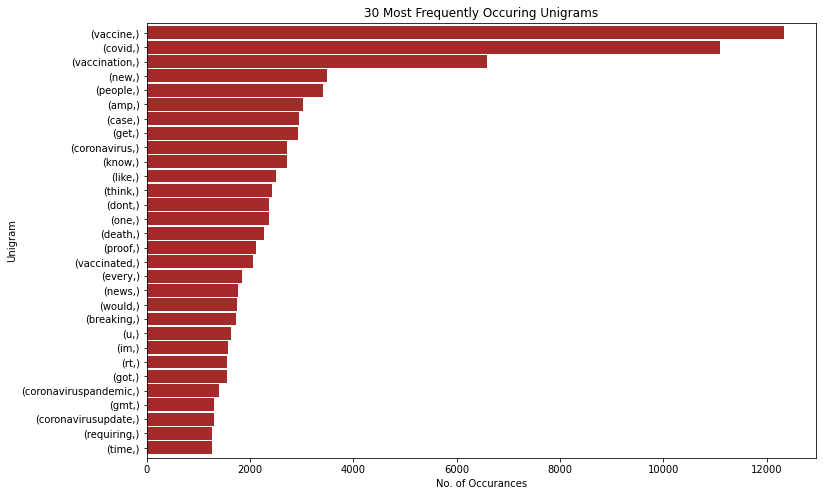

In [74]:
#Plot Unigram
unigram.sort_values().plot.barh(color='brown', width=.9, figsize=(12, 8))
plt.title('30 Most Frequently Occuring Unigrams')
plt.ylabel('Unigram')
plt.xlabel('No. of Occurances')

Text(0.5, 0, 'No. of Occurances')

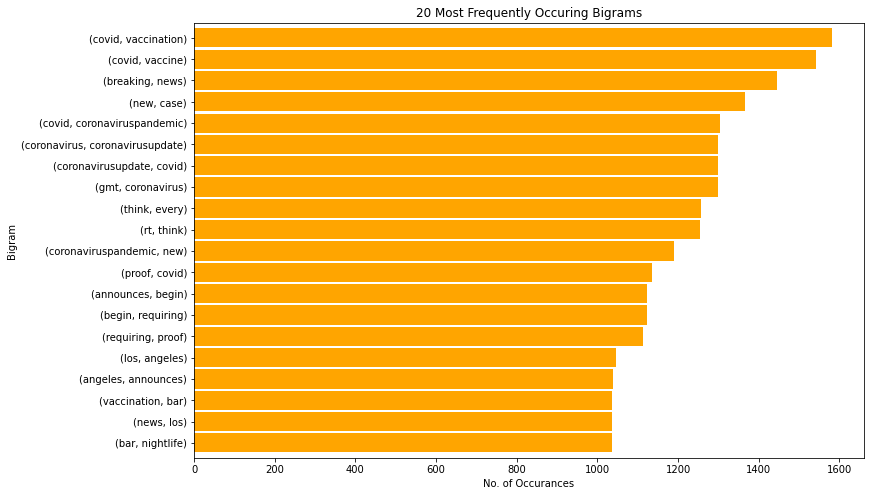

In [75]:
#plot bigram
bigram.sort_values().plot.barh(color='orange', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('No. of Occurances')

Text(0.5, 0, 'No. of Occurances')

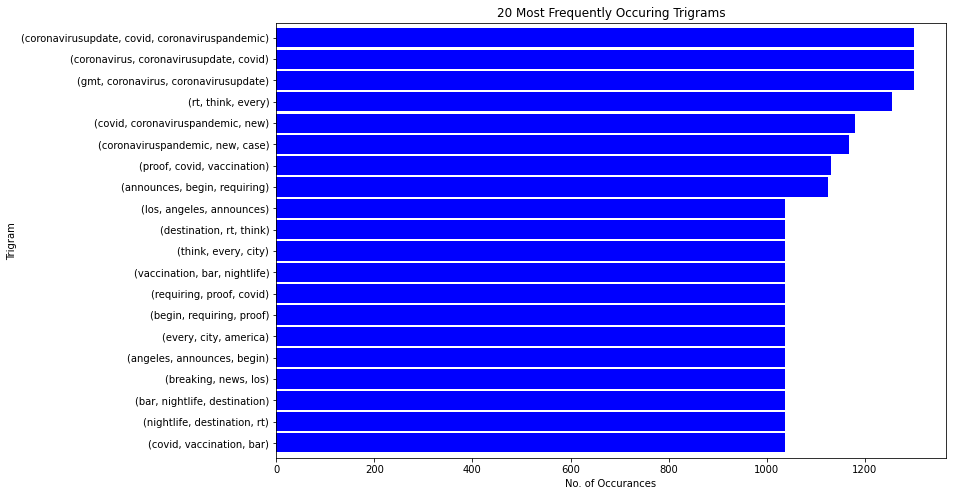

In [76]:
#plot trigram 
trigram.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Trigrams')
plt.ylabel('Trigram')
plt.xlabel('No. of Occurances')

In [77]:
dataset=df[['clean_tweet','sentiment']]
label=dataset[['sentiment']]

In [78]:
label.dtypes

sentiment    int64
dtype: object

In [79]:
text = dataset['clean_tweet'].values.tolist()

In [80]:
dataset.reset_index(inplace=True, drop=True)
dataset.head()

,clean_tweet,sentiment
0,Safe and effective,1
1,The day after the My arm is a little sore and ...,-1
2,Not a girl but part of the club,0
3,When we can get and Vaccine in India,0
4,Officially a gay,1


In [81]:
#classifying Depressive and Non depressive labels
label = []
for i in range(len(dataset)):
    lbls = dataset['sentiment'][i]
    if lbls == 1:
        lbl = 'positive'
    elif lbls==0:
        lbl = 'Neutral'
    else :
        lbl='negative'
    
    
    label.append(lbl)

<AxesSubplot:ylabel='count'>

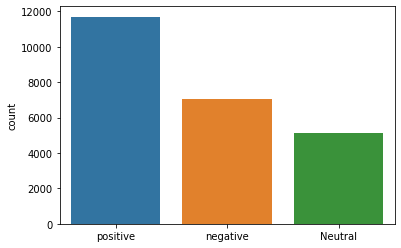

In [82]:
sns.countplot(label)

In [83]:
# Main text
text = np.array(text)

In [84]:
# Corresponding labels
label=np.array(dataset['sentiment'])

In [85]:
# Label Encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder().fit_transform(label)

In [86]:
set(label)

{0, 1, 2}

## Support Vector Machine

Ngrams(1,2)-features = All

In [87]:
# Splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(text,label,stratify=label, random_state=32)

In [88]:
X_train.shape, X_test.shape

((17923,), (5975,))

In [89]:
# Applying Count Vectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english', ngram_range=(1,2))

X_train = bow_vectorizer.fit_transform(X_train)
X_test = bow_vectorizer.transform(X_test)

In [90]:
# SVM Classifier
svm_clf = svm.SVC(kernel='linear')

# Fitting the model
svm_clf.fit(X_train, y_train)

# Prediction
prediction=svm_clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, prediction)
sensitivity = sensitivity_score(y_test, prediction, average='macro')
specificity = specificity_score(y_test, prediction, average='macro')
print('Accuracy score: ', acc)
print('Sensitivity score: ', sensitivity)
print('Specificity score: ', specificity)

Accuracy score:  0.8707949790794979
Sensitivity score:  0.8655002678540523
Specificity score:  0.9325257438586873


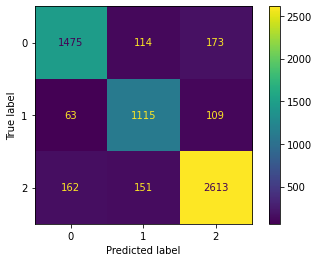

In [91]:
# Confusion Matrics
metrics.plot_confusion_matrix(svm_clf, X_test, y_test)

In [92]:
# Confusion Matrix
print(confusion_matrix(y_test, prediction))

[[1475  114  173]
 [  63 1115  109]
 [ 162  151 2613]]


In [93]:
# Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1762
           1       0.81      0.87      0.84      1287
           2       0.90      0.89      0.90      2926

    accuracy                           0.87      5975
   macro avg       0.86      0.87      0.86      5975
weighted avg       0.87      0.87      0.87      5975



Ngrams(1,2)-features = 2000

In [94]:
#splitting into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text,label,stratify=label, random_state=16)

# Applying Count Vectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=2000, stop_words='english', ngram_range=(1,2))

X_train = bow_vectorizer.fit_transform(X_train)
X_test = bow_vectorizer.transform(X_test)

# SVM Classifier
svm_clf = svm.SVC(kernel='linear')

# Fitting the model
svm_clf.fit(X_train, y_train)

# Prediction
prediction=svm_clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, prediction)
sensitivity = sensitivity_score(y_test, prediction, average='macro')
specificity = specificity_score(y_test, prediction, average='macro')
print('Accuracy score: ', acc)
print('Sensitivity score: ', sensitivity)
print('Specificity score: ', specificity)

Accuracy score:  0.8403347280334728
Sensitivity score:  0.8367964320231481
Specificity score:  0.9181902988374416


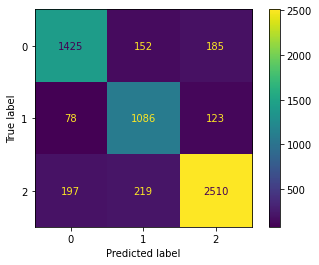

In [95]:
# Confusion Matrics
metrics.plot_confusion_matrix(svm_clf, X_test, y_test)

In [96]:
# Confusion Matrix
print(confusion_matrix(y_test, prediction))

[[1425  152  185]
 [  78 1086  123]
 [ 197  219 2510]]


In [97]:
# Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1762
           1       0.75      0.84      0.79      1287
           2       0.89      0.86      0.87      2926

    accuracy                           0.84      5975
   macro avg       0.82      0.84      0.83      5975
weighted avg       0.84      0.84      0.84      5975



## Random Forest

Ngrams(1,1)-features = All

In [98]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(text,label,stratify=label, random_state=2)

# feature extraction
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english', ngram_range=(1,1))

X_train = bow_vectorizer.fit_transform(X_train)
X_test = bow_vectorizer.transform(X_test)

# Random Forest classifier
rf_clf = RandomForestClassifier()

# Fitting the model
rf_clf.fit(X_train, y_train)

# Prediction
prediction=rf_clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, prediction)
sensitivity = sensitivity_score(y_test, prediction, average='macro')
specificity = specificity_score(y_test, prediction, average='macro')
print('Accuracy score: ', acc)
print('Sensitivity score: ', sensitivity)
print('Specificity score: ', specificity)

Accuracy score:  0.8813389121338913
Sensitivity score:  0.8760287235405223
Specificity score:  0.9361135747893131


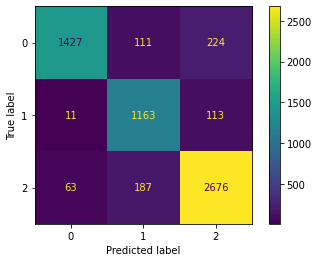

In [99]:
# Confusion Matrics
metrics.plot_confusion_matrix(rf_clf, X_test, y_test)

In [100]:
# Confusion Matrix
print(confusion_matrix(y_test, prediction))

[[1427  111  224]
 [  11 1163  113]
 [  63  187 2676]]


In [101]:
# Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.95      0.81      0.87      1762
           1       0.80      0.90      0.85      1287
           2       0.89      0.91      0.90      2926

    accuracy                           0.88      5975
   macro avg       0.88      0.88      0.87      5975
weighted avg       0.89      0.88      0.88      5975



Ngrams(1,2)-features = 2000

In [102]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(text,label,stratify=label, random_state=3)

# feature extraction
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=2000, stop_words='english', ngram_range=(1,2))

X_train = bow_vectorizer.fit_transform(X_train)
X_test = bow_vectorizer.transform(X_test)

# Random Forest classifier
rf_clf = RandomForestClassifier()

# Fitting the model
rf_clf.fit(X_train, y_train)

# Prediction
prediction=rf_clf.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, prediction)
sensitivity = sensitivity_score(y_test, prediction, average='macro')
specificity = specificity_score(y_test, prediction, average='macro')
print('Accuracy score: ', acc)
print('Sensitivity score: ', sensitivity)
print('Specificity score: ', specificity)

Accuracy score:  0.8649372384937238
Sensitivity score:  0.8564118063490787
Specificity score:  0.9279937583284793


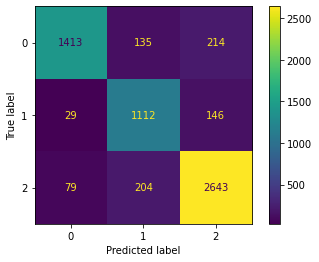

In [103]:
# Confusion Matrics
metrics.plot_confusion_matrix(rf_clf, X_test, y_test)

In [104]:
# Confusion Matrix
print(confusion_matrix(y_test, prediction))

[[1413  135  214]
 [  29 1112  146]
 [  79  204 2643]]


In [105]:
# Classification Report
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1762
           1       0.77      0.86      0.81      1287
           2       0.88      0.90      0.89      2926

    accuracy                           0.86      5975
   macro avg       0.86      0.86      0.85      5975
weighted avg       0.87      0.86      0.87      5975



##Bert

In [88]:
# Bert Requirement
import os
%reload_ext autoreload
%autoreload 2
%matplotlib inline

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"] = "0";

In [89]:
# Splitting Function
def split_data(review_text, review_label):
  train_ratio = 0.80
  test_ratio = 0.20
  X_train, X_test, y_train, y_test = train_test_split(review_text, review_label, test_size=test_ratio, stratify=review_label, random_state=100)
  return X_train, X_test, y_train, y_test

# Bert Implementation
def DistilBert(X,y):

  X_train, X_test, y_train, y_test = split_data(X, y)
  model_used = 'distilbert-base-uncased'
  from ktrain import text
 
  transformer = text.Transformer(model_name=model_used, maxlen=512, class_names=['Positive', 'Negative', 'Neutral'])

  train_data = transformer.preprocess_train(X_train, y_train)
  test_data = transformer.preprocess_test(X_test, y_test)

  model = transformer.get_classifier()

  learner = ktrain.get_learner(model, train_data=train_data, val_data = test_data, batch_size=16)
  return learner

In [90]:
# Equating
positive_tweet_list == negative_tweet_list == neutral_tweet_list

False

In [91]:
# Seperating the sentiments
sentiment_neg = list(np.ones(len(negative_tweet_list),dtype=int)*2)
sentiment_pos = list(np.ones(len(positive_tweet_list),dtype=int))
sentiment_neu = list(np.ones(len(neutral_tweet_list),dtype=int)*0)

In [92]:
# Data in desirable format
df_text = positive_tweet_list+negative_tweet_list+neutral_tweet_list
df_labels = sentiment_pos+sentiment_neg+sentiment_neu

In [93]:
!pip3 install ktrain==0.28.2 --user

  Using cached scikit_learn-0.23.2-cp37-cp37m-win_amd64.whl (6.8 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.2 which is incompatible.


In [94]:
# Implementing bert
from ktrain import text
learner = DistilBert(df_text, df_labels)

preprocessing train...
language: en
train sequence lengths:
	mean : 16
	95percentile : 27
	99percentile : 32


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 16
	95percentile : 27
	99percentile : 33


In [95]:
# Fitting the model
history = learner.fit(1e-4,10)

Epoch 1/10
1195/1195 [==============================] - 12499s 10s/step - loss: 0.4457 - accuracy: 0.8234 - val_loss: 0.3119 - val_accuracy: 0.8897
Epoch 2/10
1195/1195 [==============================] - 12632s 11s/step - loss: 0.2375 - accuracy: 0.9162 - val_loss: 0.3098 - val_accuracy: 0.8939
Epoch 3/10
1195/1195 [==============================] - 12708s 11s/step - loss: 0.1527 - accuracy: 0.9488 - val_loss: 0.3034 - val_accuracy: 0.8967
Epoch 4/10
1195/1195 [==============================] - 12395s 10s/step - loss: 0.1024 - accuracy: 0.9684 - val_loss: 0.3366 - val_accuracy: 0.9010
Epoch 5/10
1195/1195 [==============================] - 12463s 10s/step - loss: 0.1005 - accuracy: 0.9699 - val_loss: 0.4644 - val_accuracy: 0.8946
Epoch 6/10
1195/1195 [==============================] - 12325s 10s/step - loss: 0.0752 - accuracy: 0.9790 - val_loss: 0.5218 - val_accuracy: 0.8904
Epoch 7/10
1195/1195 [==============================] - 12767s 11s/step - loss: 0.0449 - accuracy: 0.9878 - val_

In [96]:
np.mean(history.history['accuracy'])

0.9558688104152679